In [1]:
import DES
import numpy as np
import simpy as sip
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statistics as st

In [2]:
mulamb = [(1,0.99), (1,0.89), (1,0.79), (1,0.69), (1,0.59), (1,0.49)]

for mu,lamd in mulamb:
    rho = lamd/(1/mu)
    name = f'servers_{rho}'
    DES.run_simu(name, sip.Resource, mu, lamd, 100)

rho = 0.99
rho = 0.99
1_servers_0.99_100
Running simulations: ██████████

rho = 0.99
2_servers_0.99_100
Running simulations: ██████████

rho = 0.99
4_servers_0.99_100
Running simulations: ██████████

rho = 0.89
rho = 0.89
1_servers_0.89_100
Running simulations: ██████████

rho = 0.89
2_servers_0.89_100
Running simulations: ██████████

rho = 0.89
4_servers_0.89_100
Running simulations: ██████████

rho = 0.79
rho = 0.79
1_servers_0.79_100
Running simulations: ██████████

rho = 0.79
2_servers_0.79_100
Running simulations: ██████████

rho = 0.79
4_servers_0.79_100
Running simulations: ██████████

rho = 0.69
rho = 0.69
1_servers_0.69_100
Running simulations: ██████████

rho = 0.69
2_servers_0.69_100
Running simulations: ██████████

rho = 0.69
4_servers_0.69_100
Running simulations: ██████████

rho = 0.59
rho = 0.59
1_servers_0.59_100
Running simulations: ██████████

rho = 0.59
2_servers_0.59_100
Running simulations: ██████████

rho = 0.59
4_servers_0.59_100
Running simulations: ██████████



In [47]:
# rhowait = {lamd:{1:[],2:[],4:[]} for mu,lamd in mulamb}
rhowait = {1:[], 2:[], 4:[]}
rhos = [l for m,l in mulamb]

for mu,lamd in mulamb:
    rho = lamd/(1/mu)
    # print(rho)
    name = f"servers_{rho}_100"
    res, cutoffs = DES.waiting_times(name)
    for n in [1,2,4]:
        # print('start',rhowait[lamd][n])
        results = res[n]
        ct = cutoffs[n]
        
        means_n = [np.mean(results[ct[i]:ct[i+1]]) for i in range(len(ct)-1)]
        means_n.append(np.mean(results[ct[-2]:ct[-1]]))
        print(n, np.mean(means_n))
        # index = int(np.ceil((n-1)/2))
        # print(index, rhowait[lamd])
        t = rhowait[n]
        t.append(np.mean(means_n))
        rhowait[n] = t
        # print(rhowait[lamd][n])
    # print(rhowait)
    # break


0.99
1 24.985257812652748
2 19.194463250815907
4 13.452291685752378
0.89
1 60.53497091622383
2 56.69502162489605
4 56.54849523825191
0.79
1 104.69160083049907
2 104.44954620666573
4 105.51192076634074
0.69
1 156.52673821725767
2 154.3306551407973
4 153.21484421024212
0.59
1 206.88651293818327
2 202.9400013443713
4 205.3118570293048
0.49
1 253.68625736843867
2 255.18918381592366
4 253.26205929449188


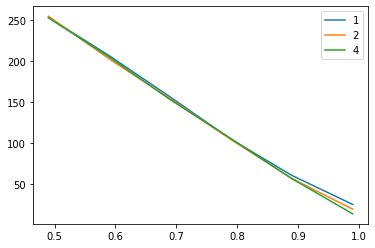

In [44]:
for k, v in rhowait.items():
    plt.plot(rhos, v, label=k)
plt.legend()
plt.show()

In [58]:
def plots(res_dict, cutoffs):
    c = [_, 'blue', 'green', _, 'orange']
    for n in [1,2,4]:
        results = res_dict[n]
        ct = cutoffs[n]
        means_n = [np.mean(results[ct[i]:ct[i+1]]) for i in range(len(ct)-1)]
        means_n.append(np.mean(results[ct[-2]:ct[-1]]))

        # Normal distribution plots
        # means_n[means_n == 0] = np.nan

        mu, std = np.mean(means_n), np.std(means_n)
        print(mu, std)
        x = np.linspace(mu - 3*std, mu + 5*std, 75)
        fig, ax = plt.subplots()
        plt.plot(x, stats.norm.pdf(x, mu, std), label=f'{n} server normal distribution', color=c[n])
        print(f"{n} server mean waiting times: {mu}")

        # Chi 2 distribution plots
        df = st.median(means_n)
        chi_x = np.linspace(stats.chi2.ppf(0.00001, df), stats.chi2.ppf(0.99999, df), 100)
        plt.plot(chi_x, stats.chi2.pdf(chi_x, df), label=f'{n} server chi2 distribution', color='black')

        # Histogram
        plt.hist(means_n, bins=int(len(means_n)/10), label=f'{n} server means', alpha=0.5, color=c[n], density=True,stacked=True)
        ax.set_xlim(0,max(means_n))
        ax.set_xlabel('Waiting times')
        plt.legend()
        plt.show()

19.082641510140316 11.83153890350205
1 server mean waiting times: 19.082641510140316


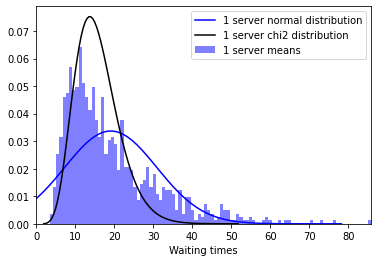

13.171967802905106 8.512811824913923
2 server mean waiting times: 13.171967802905106


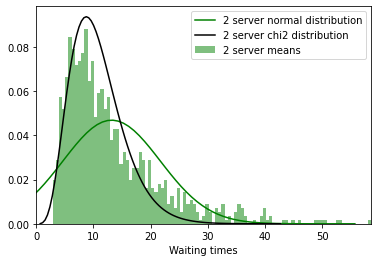

8.809957112848682 5.536681199491592
4 server mean waiting times: 8.809957112848682


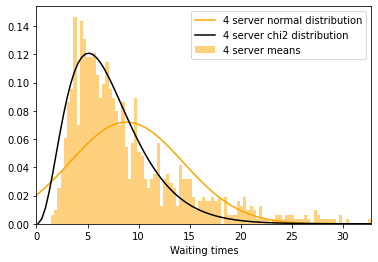

In [59]:
name = "servers_1000"
res_dict, cutoffs = DES.waiting_times(name)
plots(res_dict, cutoffs)

In [ ]:
# Waiting time distributions
plt.hist(res_dict[1], bins=100, label='1 server')
plt.hist(res_dict[2], bins=100, alpha=0.5, label='2 servers')
plt.hist(res_dict[4], bins=100, alpha=0.4, label='4 servers')
plt.legend()
plt.show()